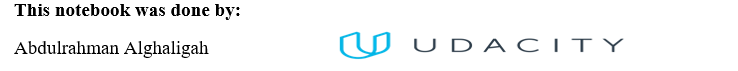

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

## Business Understanding 

1- What is the famous programming language according to 2019 Stackoverflow survey?  <br>
2- What are the top 5 countries that pay for programmers   <br>
3- Is money related to satisfaction in the top 5 countries?  <br> 


## Data Understanding 


In [2]:
df_2019=pd.read_csv('developer_survey_2019/developer_survey_2019.csv')
df_schema= pd.read_csv('developer_survey_2019/survey_results_schema.csv')

In [3]:
df_2019.head(3)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult


In [4]:
df_2019.shape

(88883, 85)

In [5]:
df_2019_schema=pd.read_csv('developer_survey_2019/survey_results_schema.csv')
df_2019_schema

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open sour...
...,...,...
80,Sexuality,Which of the following do you currently identi...
81,Ethnicity,Which of the following do you identify as? Ple...
82,Dependents,"Do you have any dependents (e.g., children, el..."
83,SurveyLength,How do you feel about the length of the survey...


In [6]:
df_2019.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,88883.000000,5.594500e+04,5.582300e+04,64503.000000,49790.000000,79210.000000
mean,44442.000000,5.519014e+11,1.271107e+05,42.127197,5.084308,30.336699
std,25658.456325,7.331926e+13,2.841523e+05,37.287610,5.513931,9.178390
min,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,22221.500000,2.000000e+04,2.577750e+04,40.000000,2.000000,24.000000
50%,44442.000000,6.200000e+04,5.728700e+04,40.000000,4.000000,29.000000
75%,66662.500000,1.200000e+05,1.000000e+05,44.750000,6.000000,35.000000
max,88883.000000,1.000000e+16,2.000000e+06,4850.000000,99.000000,99.000000


In [7]:
df_2019.isnull().sum()

Respondent          0
MainBranch        552
Hobbyist            0
OpenSourcer         0
OpenSource       2041
                ...  
Sexuality       12736
Ethnicity       12215
Dependents       5824
SurveyLength     1899
SurveyEase       1802
Length: 85, dtype: int64

## Question 1: What are the most used programming languages according to 2019 Stackoverflow survey? 

### Data Preparation

In [8]:
df_2019['LanguageWorkedWith']

0                          HTML/CSS;Java;JavaScript;Python
1                                      C++;HTML/CSS;Python
2                                                 HTML/CSS
3                                      C;C++;C#;Python;SQL
4              C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA
                               ...                        
88878                        HTML/CSS;JavaScript;Other(s):
88879                                                  NaN
88880                                                  NaN
88881                                                  NaN
88882    Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...
Name: LanguageWorkedWith, Length: 88883, dtype: object

In [9]:
df_2019['LanguageWorkedWith'].isnull().sum()

1314

In [10]:
df_1=df_2019.dropna(subset=['LanguageWorkedWith'])

In [11]:
df_1['LanguageWorkedWith'].isnull().sum()

0

### Data Modelling 

In [12]:
def split_column(df, column):
    '''
    Split column by ;,
    Then Returns a splited series.
    '''
    df_copy = df
    columnSeries = df_copy[column].apply(lambda x: x.split(';'))
    return columnSeries

In [13]:
languages=split_column(df_1,'LanguageWorkedWith')

In [14]:
languages

0                     [HTML/CSS, Java, JavaScript, Python]
1                                  [C++, HTML/CSS, Python]
2                                               [HTML/CSS]
3                                [C, C++, C#, Python, SQL]
4        [C++, HTML/CSS, Java, JavaScript, Python, SQL,...
                               ...                        
88875                         [HTML/CSS, Java, JavaScript]
88876                       [HTML/CSS, JavaScript, Python]
88877    [Bash/Shell/PowerShell, Go, HTML/CSS, JavaScri...
88878                    [HTML/CSS, JavaScript, Other(s):]
88882    [Bash/Shell/PowerShell, HTML/CSS, Java, JavaSc...
Name: LanguageWorkedWith, Length: 87569, dtype: object

In [15]:
#Just Flating a nested list
def flat(array_list):
    '''
    Flat a nested list,
    Then Returns a flat list.
    '''
    object_list = []
    for row in array_list:
        for obj in row:
            object_list.append(obj.strip())
            
    return object_list

In [16]:
unique_list=flat(languages)

In [17]:
def list_of_group(data_list):
    '''
    Group by count to a list,
    Returns a result dict
    '''
    grouped_list = dict(Counter(data_list))
    grouped_dict = [{'Programming Language':key, 'Count': value} for key, value in grouped_list.items()]
    return grouped_dict

In [18]:
dict_languages_used=list_of_group(unique_list)

In [19]:
df_answer1=pd.DataFrame(dict_languages_used)

In [20]:
top_5=df_answer1.sort_values(by=['Count'],ascending=False).head(5)

In [21]:
top_5

,Programming Language,Count
2,JavaScript,59219
0,HTML/CSS,55466
7,SQL,47544
3,Python,36443
1,Java,35917


In [22]:
top_5.reset_index(inplace=True)


In [23]:
top_5.drop(columns='index',axis=1,inplace=True)

In [24]:
top_5.set_index('Programming Language',inplace=True)

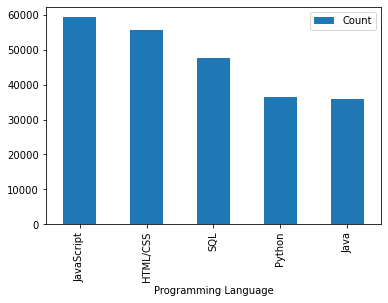

In [25]:
top_5.plot(kind='bar');

### Evaluate the results:
<li> We can easily see that  JavaScript is the most used language 
<li> By looking to the languages we assume that the top responders seems to be web devlopers

# Question 2 : What are the top 5 countries that pay for programmers?

In [26]:
df_2019.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [27]:
def column_descripton(column_name):
    return df_2019_schema[df_2019_schema['Column']==column_name].QuestionText

In [28]:
column_descripton('ConvertedComp')

31    Salary converted to annual USD salaries using ...
Name: QuestionText, dtype: object

In [29]:
column_descripton('CompFreq')

30    Is that compensation weekly, monthly, or yearly?
Name: QuestionText, dtype: object

In [30]:
df_salary=df_2019[df_2019['ConvertedComp'].isnull()==False]

In [31]:
needed_columns= [
    'Respondent','Country','CompTotal','CompFreq','ConvertedComp'
]

In [32]:
df_salary=df_salary[needed_columns]

In [33]:
df_salary

,Respondent,Country,CompTotal,CompFreq,ConvertedComp
2,3,Thailand,23000.0,Monthly,8820.0
3,4,United States,61000.0,Yearly,61000.0
5,6,Canada,40000.0,Monthly,366420.0
8,9,New Zealand,138000.0,Yearly,95179.0
9,10,India,950000.0,Yearly,13293.0
...,...,...,...,...,...
88325,88878,United States,130000.0,Yearly,130000.0
88326,88879,Finland,6000.0,Monthly,82488.0
88328,88881,Austria,60000.0,Yearly,68745.0
88329,88882,Netherlands,42768.0,Monthly,588012.0


In [34]:
df_salary['ConvertedComp'][df_salary['CompFreq']=='Yearly'].apply(lambda x: x/12)

3         5083.333333
8         7931.583333
9         1107.750000
12        7500.000000
16        5439.750000
             ...     
88320     6043.500000
88323    15000.000000
88325    10833.333333
88328     5728.750000
88330     1909.583333
Name: ConvertedComp, Length: 30537, dtype: float64

In [35]:
df_salary

,Respondent,Country,CompTotal,CompFreq,ConvertedComp
2,3,Thailand,23000.0,Monthly,8820.0
3,4,United States,61000.0,Yearly,61000.0
5,6,Canada,40000.0,Monthly,366420.0
8,9,New Zealand,138000.0,Yearly,95179.0
9,10,India,950000.0,Yearly,13293.0
...,...,...,...,...,...
88325,88878,United States,130000.0,Yearly,130000.0
88326,88879,Finland,6000.0,Monthly,82488.0
88328,88881,Austria,60000.0,Yearly,68745.0
88329,88882,Netherlands,42768.0,Monthly,588012.0


In [36]:
df_2019['CompFreq'].value_counts()

Yearly     31505
Monthly    29057
Weekly      2706
Name: CompFreq, dtype: int64

In [37]:
df_salary['ConvertedComp']=df_salary['ConvertedComp']

In [38]:
df_salary

,Respondent,Country,CompTotal,CompFreq,ConvertedComp
2,3,Thailand,23000.0,Monthly,8820.0
3,4,United States,61000.0,Yearly,61000.0
5,6,Canada,40000.0,Monthly,366420.0
8,9,New Zealand,138000.0,Yearly,95179.0
9,10,India,950000.0,Yearly,13293.0
...,...,...,...,...,...
88325,88878,United States,130000.0,Yearly,130000.0
88326,88879,Finland,6000.0,Monthly,82488.0
88328,88881,Austria,60000.0,Yearly,68745.0
88329,88882,Netherlands,42768.0,Monthly,588012.0


In [39]:
df_salary=df_salary[df_salary['ConvertedComp']!=0.0]

In [40]:
df_coutry_avg_pay=df_salary.groupby('Country')['ConvertedComp'].mean()

In [41]:
df_coutry_avg_pay=df_coutry_avg_pay.sort_values(ascending=False)[:5]

<AxesSubplot:xlabel='Country'>

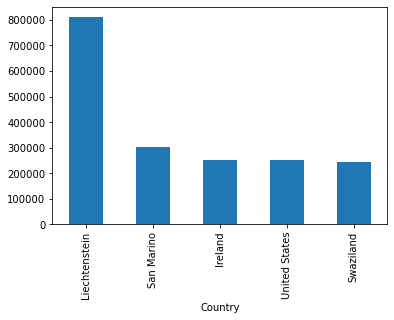

In [42]:
df_coutry_avg_pay.plot(kind='bar')


### Evaluate the results: <br>
<li> The top 5 countries that have the highest average salary according to the survey are Liechtenstein, San Marino, Ireland, the United States and Swaziland

# Question 3 : Is money related to satisfaction in the top 5 countries?

In [43]:
df_sats=df_2019[df_2019['JobSat'].isnull()==False]

In [44]:
df_sats_top5=df_sats[(df_sats.Country == 'Liechtenstein')| (df_sats.Country == 'San Marino')|
                     (df_sats.Country == 'Ireland')| (df_sats.Country == 'United States')|(df_sats.Country == 'Swaziland')]

In [45]:
Columns=[
    'Country','JobSat'
]

In [47]:
df_sats_top5=df_sats_top5[Columns]

In [49]:
df_sats_top5=df_sats_top5.groupby('JobSat').count()

In [50]:
df_sats_top5

,Country
JobSat,
Neither satisfied nor dissatisfied,1580
Slightly dissatisfied,2347
Slightly satisfied,5713
Very dissatisfied,1063
Very satisfied,7321


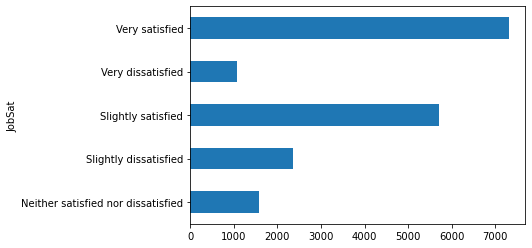

In [52]:
df_sats_top5.plot(kind='barh',legend=False);


### Evaluate the results: <br>
<li>By looking at the results we can see that the salary is related to the employee satisfaction